In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
x = np.linspace (-1,1,100)

In [8]:
sigma = 0.1
beta = 0.2

In [9]:
A = np.exp(-(x**2)/2/(sigma**2))

In [10]:
phase = (beta*x/(sigma**2)) * np.exp(-(x**2)/2/(sigma**2))

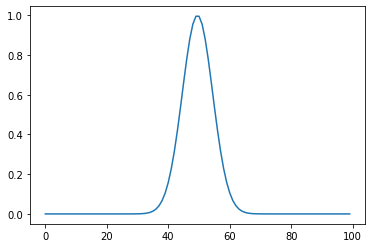

In [11]:
plt.plot(A)

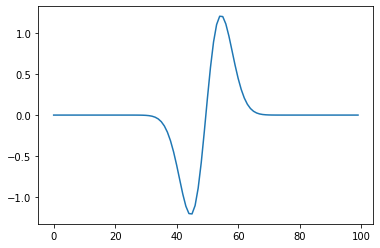

In [12]:
plt.plot(phase)

In [13]:
##################################

In [14]:
I = A * np.sin(phase)
Q = A * np.cos(phase)

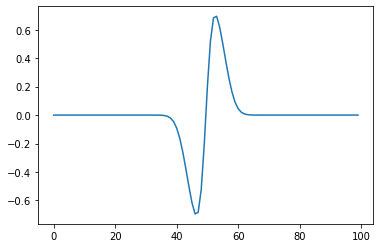

In [15]:
plt.plot(I)

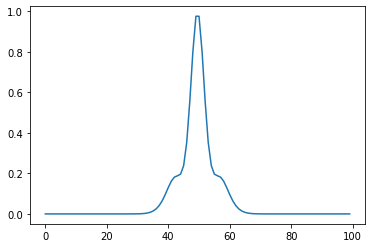

In [16]:
plt.plot(Q)

In [130]:
############## DONE
def gaussian_I_Q (amplitude = float, width = float, sigma = float, beta = float):

    """This method creates envelopes of I and Q signals to be fed to a IQ mixer.
    The I and Q signals are made in such a way that the aplitude of the signal is gaussian
    and its phase is gaussian derrivative.
    A.k.a this implements a DRAG gaussian pulse.

    INPUTS:
        amplitude - the amplitude scaler of the signal, takes value [0 to 1]
        width -  width of the gaussian in [sec]
        sigma - the sigma of the gaussian [sec]
        beta - The DRAG coefficient / ALPHA   
        
    OUTPUTS:
        I component of the signal
        Q component of the signal
        
    NOTES:
        ALPHA  is the anharmonicity = omega12 - omega01, normally about 200-300 MHz
        The DRAG coefficient - should theoretically be 0.5, for optimal phase correction  
        
    """

    delta_t = 1e-9

    segment_length = width / delta_t # how many dataponts we would need to express the signal
    segment_length = int(segment_length) # round it up

    how_many_sigmas_wide = width/sigma

    x = np.linspace (-width/2, width/2, segment_length)

    A = np.exp(-(x**2)/2/(sigma**2)) #* (1/sigma*np.sqrt(2*np.pi)) # Amplitude
    phase = (beta*x/(sigma**2)) * np.exp(-(x**2)/2/(sigma**2)) # Phase

    I = A * np.cos(phase)  
    Q = A * np.sin(phase)
    
    return I, Q
    
sigma = 1e-6
I, Q = gaussian_I_Q (amplitude = 1, width = 8*sigma, sigma = sigma, beta = 1e-6)
############## DONE

In [175]:
def gaussian_I_Q_with_IF (IF_frequency = float, amplitude = float, width = float, sigma = float, beta = float):

    """This method creates envelopes of I and Q signals to be fed to a IQ mixer.
    The I and Q signals are made in such a way that the aplitude of the signal is gaussian
    and its phase is gaussian derrivative.
    A.k.a this implements a DRAG gaussian pulse.

    INPUTS:
        amplitude - the amplitude scaler of the signal, takes value [0 to 1]
        width -  width of the gaussian in [sec]
        sigma - the sigma of the gaussian [sec]
        beta - The DRAG coefficient / ALPHA   
        
    OUTPUTS:
        I component of the signal
        Q component of the signal
        
    NOTES:
        ALPHA  is the anharmonicity = omega12 - omega01, normally about 200-300 MHz
        The DRAG coefficient - should theoretically be 0.5, for optimal phase correction  
        
    """

    delta_t = 1e-9
    
    ################ THE ENVELOPE ######

    segment_length = width / delta_t # how many dataponts we would need to express the signal
    segment_length = int(segment_length) # round it up

    how_many_sigmas_wide = width/sigma

    x = np.linspace (-width/2, width/2, segment_length)

    A = np.exp(-(x**2)/2/(sigma**2)) # Amplitude
    phase = (beta*x/(sigma**2)) * np.exp(-(x**2)/2/(sigma**2)) # Phase

    I = A * np.cos(phase)  
    Q = A * np.sin(phase)
    
    ################# THE IF SINGAL ########
    
    y = np.linspace (-(np.pi*IF_frequency*width), (np.pi*IF_frequency*width), segment_length)
    print (segment_length)
    
    I_mod = I*np.cos(y) + Q*np.sin(y)
    Q_mod = Q*np.cos(y) - I*np.sin(y)
    
    return I_mod, Q_mod
    
sigma = 1e-6
I, Q = gaussian_I_Q_with_IF (IF_frequency = 10e6, amplitude = 1, width = 4*sigma, sigma = sigma, beta = 1e-6)

3999


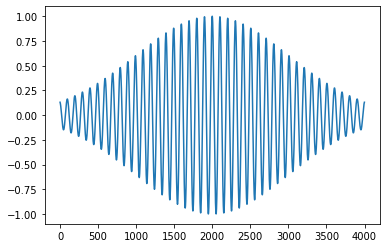

In [176]:
plt.plot(I)

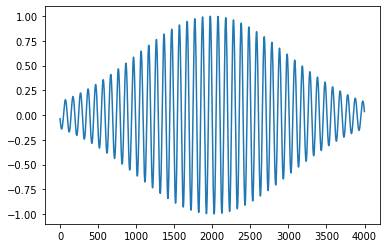

In [174]:
plt.plot(Q)

In [177]:
a = [1,2,3]
b = [4,5,6]

In [178]:
c = a + b

In [192]:
def my_function(*k):
    # print (len(k))
    print("Brand: ", k[0])
    print("Model: ", k[1])
    print("Year: ", k[0])
    
    l = []
    for i in range(len(k)):
        print (i)
        l = np.concatenate((l,k[i]), axis = None)
        
    print (len(l))
    
    print (l)
        
my_function("Apple", "iPhone 11 Pro", "2020")

Brand:  Apple
Model:  iPhone 11 Pro
Year:  Apple
0
1
2
3
['Apple' 'iPhone 11 Pro' '2020']
